In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

LOADING IMAGES

In [6]:
train_dir="/Users/uvaishnav/git workspace/ANN-practise/vgg16_with_Svc_classifier/asian_african_elephants/train"
test_dir="/Users/uvaishnav/git workspace/ANN-practise/vgg16_with_Svc_classifier/asian_african_elephants/test"

datagen=ImageDataGenerator(
    rescale=1/255.0
)

train_generator=datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode='binary'
)

test_generator=datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    class_mode='binary'
)


Found 840 images belonging to 2 classes.


Found 188 images belonging to 2 classes.


DEFINING VGG16 ARCHETECTURE

In [7]:
vgg16_model=Sequential()

vgg16_model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
vgg16_model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
vgg16_model.add(MaxPooling2D(2,2))

for i in range(2):
    vgg16_model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
vgg16_model.add(MaxPooling2D(2,2))

for i in range(3):
    vgg16_model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
vgg16_model.add(MaxPooling2D(2,2))

for i in range(3):
    vgg16_model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
vgg16_model.add(MaxPooling2D(2,2))

for i in range(3):
    vgg16_model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
vgg16_model.add(MaxPooling2D(2,2))

vgg16_model.add(Flatten())

Extracting features from vgg16 model

In [9]:
feature_extractor = Sequential(vgg16_model.layers[::])
feature_extractor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [10]:
train_features = feature_extractor.predict(train_generator)
test_features = feature_extractor.predict(test_generator)

6/6 [==============================] - 22s 4s/step


SVM for classification

In [11]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [12]:
train_labels = train_generator.labels
test_labels = test_generator.labels

In [13]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(train_features,train_labels)

SVC(kernel='linear')

Make predictions and evaluate

In [15]:
y_pred = svm_classifier.predict(test_features)

confusion_matrix_result=confusion_matrix(y_true=test_labels,y_pred=y_pred)
accuracy = accuracy_score(y_true=test_labels,y_pred=y_pred)
classification_report_result =classification_report(y_true=test_labels,y_pred=y_pred)


print("confusion Matrix :\n")
print(confusion_matrix_result)

print("\nAccuracy Score : ",accuracy)

print("\nClassification Report :\n")
print(classification_report_result)

confusion Matrix :

[[60 37]
 [56 35]]

Accuracy Score :  0.5053191489361702

Classification Report :

              precision    recall  f1-score   support

           0       0.52      0.62      0.56        97
           1       0.49      0.38      0.43        91

    accuracy                           0.51       188
   macro avg       0.50      0.50      0.50       188
weighted avg       0.50      0.51      0.50       188



Plot Confusion Matrix

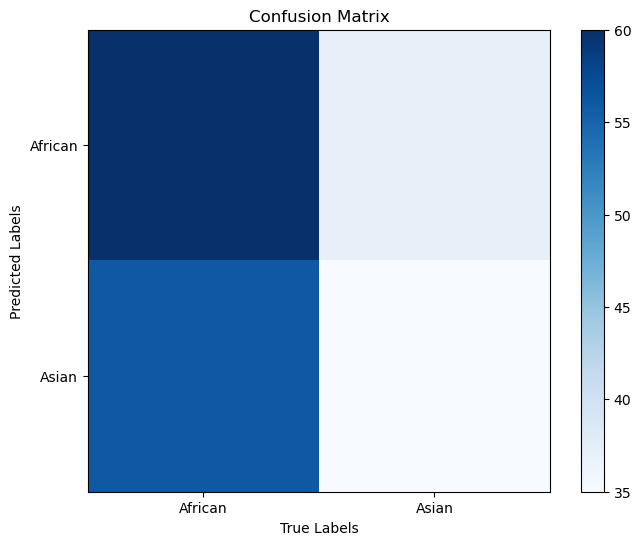

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.imshow(confusion_matrix_result,interpolation='nearest',cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

class_labels = list(train_generator.class_indices.keys())

plt.xticks(np.arange(len(class_labels)),class_labels)
plt.yticks(np.arange(len(class_labels)),class_labels)

plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")

plt.show()
